In [1]:
import numpy as np
import pandas as pd
from scipy import optimize

import matplotlib.pyplot as plt

import multipletau

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:
def func_(x, T, c):
    return (( ((T-x)/(c*(T**2))) * np.heaviside((T-x),0.5)) )

In [4]:
DELTA_T = 0.39

# Single track analysis

In [5]:
# read one file
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Long-Movie/SnailCore/"
files = [
    "Snail S 061222 E1_2_track.csv",]

f = path+files[0]
datas = pd.read_csv(f)
datas.drop(index=[0,1,2], inplace=True)
datas['FRAME'] = pd.to_numeric(datas["FRAME"])
datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])

In [42]:
print(np.unique(datas.TRACK_ID))
datas.head()

[   1   26   46   82   84  257  269  379 1237]


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MANUAL_SPOT_COLOR,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
3,ID1128465,1128465,1,31602.73828125,1.661986,15.121679,6.13753714976668,74.558268,504,0.27675532062103897,1,NaN,1604.518987,1393.0,61.0,5071.0,126757.0,1044.6237804030582,0.44983406484029576,0.9531230864564243
4,ID1026060,1026060,1,23227.630859375,1.560255,14.576224,4.347210701020419,0.000000,0,0.27675532062103897,1,NaN,1302.822785,1124.0,0.0,4181.0,102923.0,930.6722516477093,0.4519793412476514,0.8715187259297769
5,ID1080340,1080340,1,25617.3515625,1.376999,15.337710,5.857160505337741,44.823720,303,0.27675532062103897,1,NaN,1255.645570,1054.0,190.0,3903.0,99196.0,806.3287017914495,0.4539666232982111,0.9724212298402651
6,ID1047562,1047562,1,30392.880859375,1.794625,15.662999,2.6965241732995366,19.823031,134,0.27675532062103897,1,NaN,1532.000000,1368.0,271.0,3530.0,121028.0,865.8135495382955,0.4434095137071795,1.0871258596283908
7,ID1034248,1034248,1,23697.529296875,1.479641,15.868334,4.184814467905968,8.284252,56,0.27675532062103897,1,NaN,1439.012658,1389.0,87.0,2986.0,113682.0,730.7559397141144,0.45593487658980997,1.2333408634102967


In [43]:
np.unique(datas.TRACK_ID)


array([   1,   26,   46,   82,   84,  257,  269,  379, 1237])

1
[ 1.88128928 21.99102499]
[691.01547338  59.11502537]


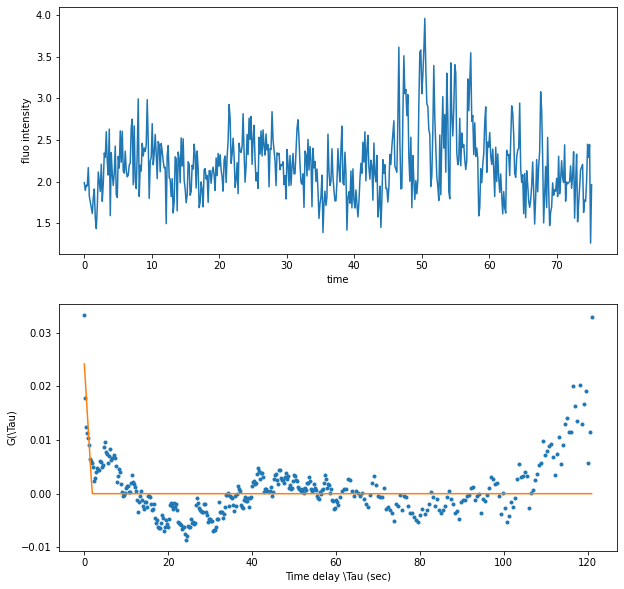

In [44]:
# Analyse one track
# Choose your track id
id_= np.unique(datas.TRACK_ID)[0]
id_ = 1
print(id_)

x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values/2**16*100
fig, ax = plt.subplots(2,1)
ax[0].plot(x,y)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
if (mm%2)==0: 
    autocor = multipletau.autocorrelate(y,
                                    m=mm,
                                    deltat=DELTA_T, 
                                    normalize=True)
else: 
    autocor = multipletau.autocorrelate(y,
                                    m=mm+1,
                                    deltat=DELTA_T,
                                    normalize=True)



popt, pcov = optimize.curve_fit(func_, 
                            autocor.flatten()[0::2],
                            autocor.flatten()[1::2], 
                            method='lm' )

print(popt)
print(1300/popt)
ax[1].plot(autocor.flatten()[0::2], autocor.flatten()[1::2], '.')
ax[1].plot(autocor.flatten()[0::2], func_(autocor.flatten()[0::2], *popt) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")

fig.set_size_inches((10,10))

# plot all track that was keep in result table

In [150]:
# read one file
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Long-Movie/SnailShadow/"
files = [
        "Snail S 061222 E1_2_track.csv", #0.15
    "Snail S 061222 E2_1_track.csv",#0.24
    "Snail S 061222 E2_3_track.csv", #0.39
#     "Snail S 061222 E3_1_track.csv", #bad
    "Snail S 061222 E3_2_track.csv", #0.15
    "Snail S 061222 E3_3_track.csv", #0.39
]
DELTA_T = 0.15
f = path+files[3]

datas = pd.read_csv(f)
datas.drop(index=[0,1,2], inplace=True)
datas['FRAME'] = pd.to_numeric(datas["FRAME"])
datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])

In [151]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]

datas = pd.read_csv(f)
datas.drop(index=[0,1,2], inplace=True)
datas['FRAME'] = pd.to_numeric(datas["FRAME"])
datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])



for id_ in np.unique(datas['TRACK_ID']):

    x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values-np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values)

    mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
    if (mm%2)==0: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm,
                                        deltat=DELTA_T, 
                                        normalize=True)
    else: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm+1,
                                        deltat=DELTA_T,
                                        normalize=True)



    popt, pcov = optimize.curve_fit(func_, 
                                autocor.flatten()[0::2],
                                autocor.flatten()[1::2], 
                                method='lm' )
    if popt[0]>5:
        d = pd.DataFrame.from_dict({'file_name':f.split('/')[-2],
                                    'track_id':id_,
                                    'len_track': len(x),
                                    'elongation_time':popt[0],
                                    'init_translation_rate':popt[1]},
                                   orient='index').T
        result = pd.concat([result, d], ignore_index=True)

# result.drop(result[result["len_track"]<100].index, inplace=True)
result['elongation_time_norm'] = 1300/result['elongation_time']
result['init_translation_rate_norm'] = result['init_translation_rate']
result['tmp'] = 1

In [152]:
result

,file_name,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm,tmp
0,SnailShadow,2,308,6.078994,1.112528,213.851156,1.112528,1
1,SnailShadow,4,390,14.10019,1.170139,92.197336,1.170139,1
2,SnailShadow,6,231,13.297088,0.383241,97.765766,0.383241,1
3,SnailShadow,105,388,9.716673,1.739196,133.790644,1.739196,1
4,SnailShadow,135,265,8.651105,0.846365,150.269828,0.846365,1
5,SnailShadow,176,276,12.449921,0.533031,104.418335,0.533031,1


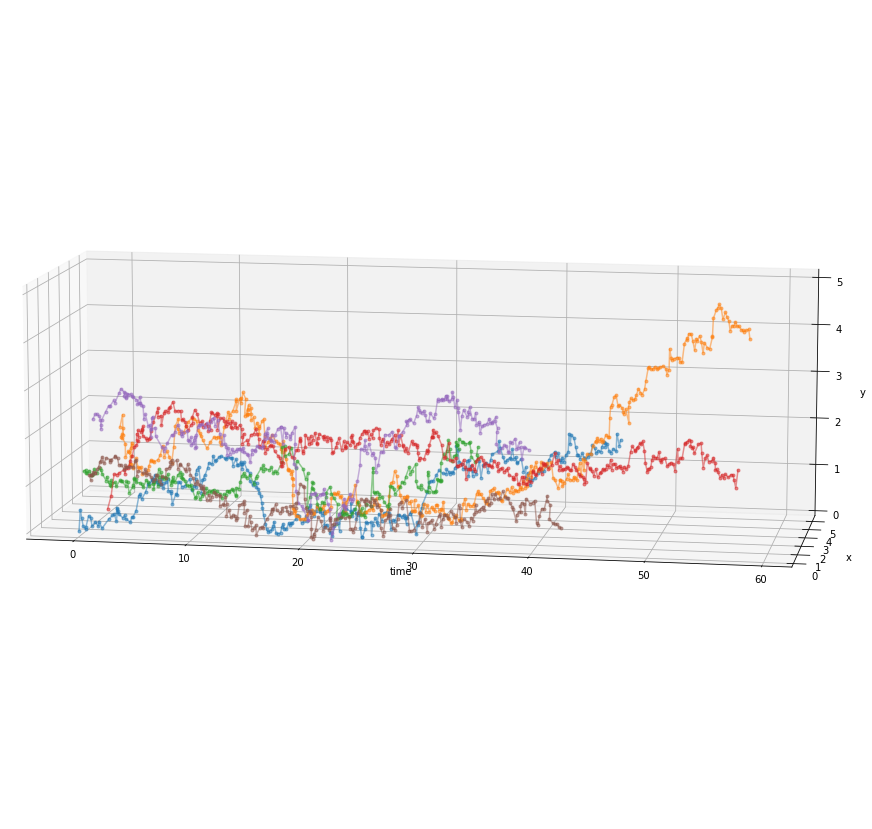

In [124]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5, 1]))
ax.set_box_aspect(aspect = (3,1,1))


for id_ in np.unique(result['track_id'].to_numpy()):
    x = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()))
    y = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()))
    z = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()))
    
    ax.plot(x, 
            y, 
            z, 
            '.-',
            alpha = 0.5
            )

ax.set_xlabel('time')
ax.set_ylabel('x')
ax.set_zlabel('y')
fig.set_size_inches((15, 15))

ax.view_init(elev=10., azim=-80)

6


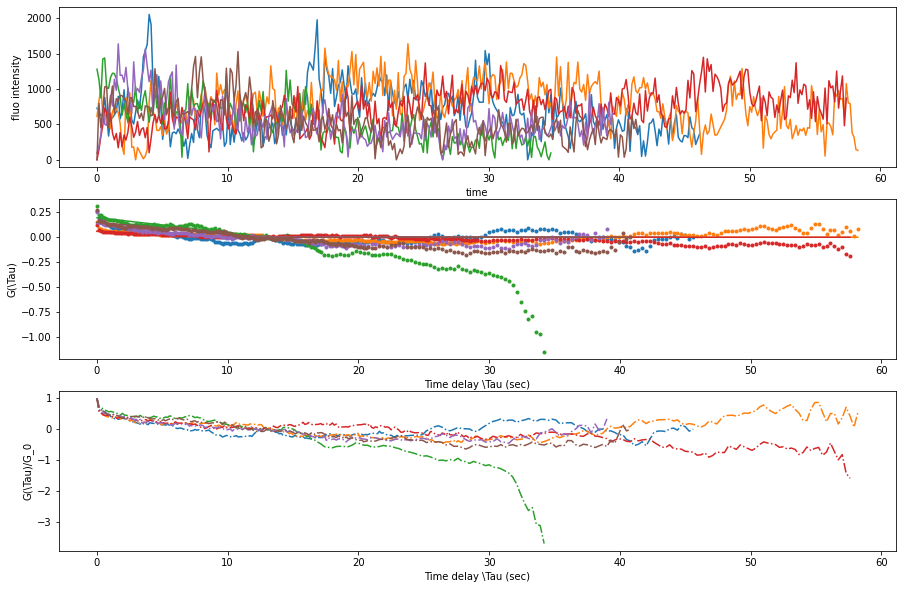

In [125]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(3,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for id_ in np.unique(result['track_id']):#[:5]:

    x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values-np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values)
    
    ax[0].plot(x, y, color=colors[i])


    mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
    if (mm%2)==0: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm,
                                        deltat=DELTA_T, 
                                        normalize=True)
    else: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm+1,
                                        deltat=DELTA_T,
                                        normalize=True)



    popt, pcov = optimize.curve_fit(func_, 
                                autocor.flatten()[0::2],
                                autocor.flatten()[1::2], 
                                method='lm' )


    ax[1].plot(autocor.flatten()[0::2], autocor.flatten()[1::2], '.', color=colors[i])
    ax[1].plot(autocor.flatten()[0::2], func_(autocor.flatten()[0::2], *popt), color=colors[i] )
    
    ax[2].plot(autocor.flatten()[0::2], autocor.flatten()[1::2]/autocor.flatten()[1], '-.', color=colors[i])
    
    
    if i == 7:
        i=0
    else:
        i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")

ax[2].set_xlabel("Time delay \Tau (sec)")
ax[2].set_ylabel("G(\Tau)/G_0")

fig.set_size_inches((15,10))
print(len(np.unique(result['track_id'])))

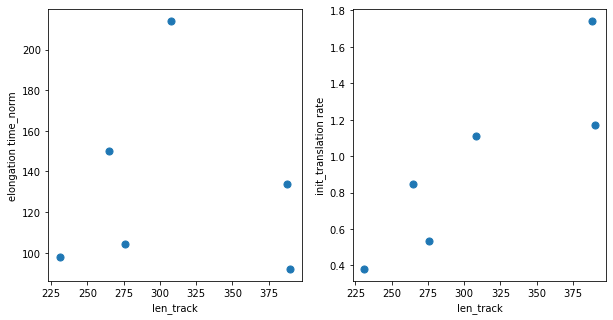

In [127]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(result['len_track'], result['elongation_time_norm'], s=50)
ax[1].scatter(result['len_track'], result['init_translation_rate'], s=50)
ax[0].set_xlabel('len_track')
ax[0].set_ylabel('elongation time_norm')

ax[1].set_xlabel('len_track')
ax[1].set_ylabel('init_translation rate')
fig.set_size_inches((10,5))

# Multiple file analysis

In [6]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Long-Movie/SnailShadow/"
files = [
    "Snail S 061222 E1_2_track.csv", #0.15
    "Snail S 061222 E2_1_track.csv",#0.24
    "Snail S 061222 E2_3_track.csv", #0.39
#     "Snail S 061222 E3_1_track.csv", #bad
    "Snail S 061222 E3_2_track.csv", #0.15
    "Snail S 061222 E3_3_track.csv", #0.39
    
        ]
DELTA_T = [0.15, 0.24, 0.39, 0.15, 0.39]
DELTA_T = 0.39

In [8]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]
i=0
for f in files:
    f = path+f
    datas = pd.read_csv(f)
    datas.drop(index=[0,1,2], inplace=True)
    datas['FRAME'] = pd.to_numeric(datas["FRAME"])
    datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
    datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
    datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
    datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
    datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])
    


    for id_ in np.unique(datas['TRACK_ID']):
        
        x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
        y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values)

        mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
        if (mm%2)==0: 
            autocor = multipletau.autocorrelate(y,
                                            m=mm,
                                            deltat=DELTA_T, 
                                            normalize=True)
        else: 
            autocor = multipletau.autocorrelate(y,
                                            m=mm+1,
                                            deltat=DELTA_T,
                                            normalize=True)



        popt, pcov = optimize.curve_fit(func_, 
                                    autocor.flatten()[0::2],
                                    autocor.flatten()[1::2], 
                                    method='lm' )
        if popt[0]>5:
            d = pd.DataFrame.from_dict({'file_name':f.split('/')[-1],
                                        'track_id':id_,
                                        'len_track': len(x)*DELTA_T,
                                        'elongation_time':popt[0],
                                        'init_translation_rate':popt[1]},
                                       orient='index').T
            result = pd.concat([result, d], ignore_index=True)
    i+=1

result['elongation_time_norm'] = 1200/result['elongation_time']
result['init_translation_rate_norm'] = result['init_translation_rate']            
# result.drop(result[result["len_track"]<100].index, inplace=True)

In [9]:
result.sort_values('len_track')

,file_name,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm
8,Snail S 061222 E3_2_track.csv,6,90.09,34.572429,0.1474,34.709739,0.1474
1,Snail S 061222 E1_2_track.csv,1237,94.38,9.453511,1.279751,126.936965,1.279751
5,Snail S 061222 E2_3_track.csv,3212,94.77,11.649474,1.078833,103.008945,1.078833
3,Snail S 061222 E2_1_track.csv,933,103.35,11.467176,1.364522,104.646514,1.364522
10,Snail S 061222 E3_2_track.csv,135,103.35,22.492872,0.325525,53.350235,0.325525
11,Snail S 061222 E3_2_track.csv,176,107.64,32.369989,0.205011,37.071376,0.205011
4,Snail S 061222 E2_1_track.csv,1416,117.39,14.820214,0.932712,80.970489,0.932712
6,Snail S 061222 E3_2_track.csv,2,120.12,15.805386,0.427895,75.923488,0.427895
2,Snail S 061222 E2_1_track.csv,635,131.04,37.048494,0.172934,32.389981,0.172934
0,Snail S 061222 E1_2_track.csv,26,143.91,18.638425,0.443192,64.383122,0.443192


track_id                      517.000000
len_track                     134.428125
elongation_time                24.451366
init_translation_rate           0.686732
elongation_time_norm           66.853008
init_translation_rate_norm      0.686732
dtype: float64


/tmp/ipykernel_135288/2469479023.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(result.mean())


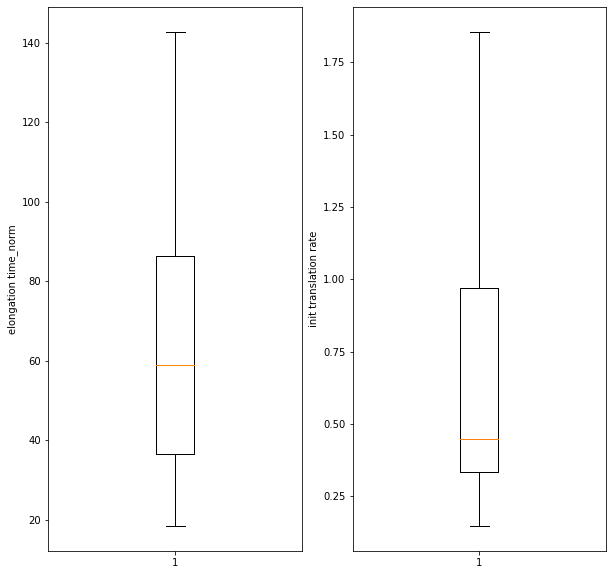

In [10]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(result['elongation_time_norm'])
ax[1].boxplot(result['init_translation_rate'])
ax[0].set_ylabel('elongation time_norm')
ax[1].set_ylabel('init translation rate')
fig.set_size_inches((10,10))
print(result.mean())

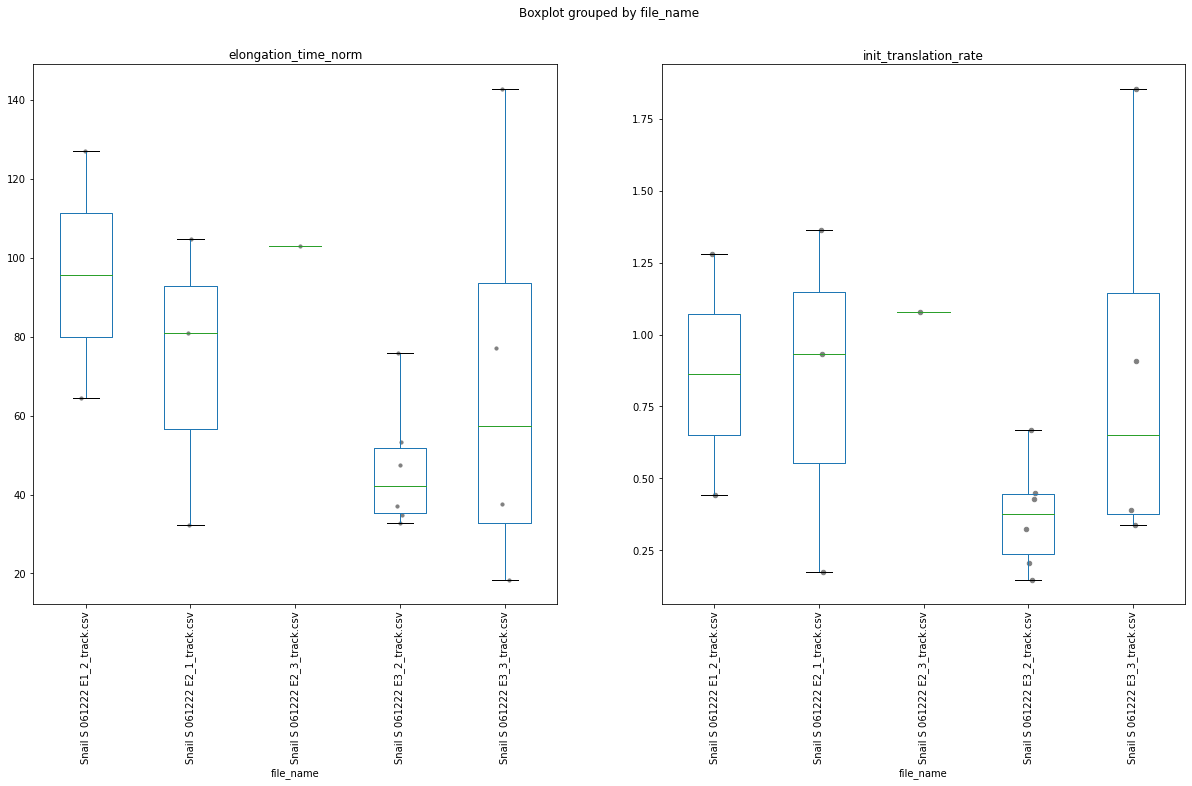

In [11]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = plt.subplots(1,2)
result.boxplot(['elongation_time_norm'] , 
               by='file_name', 
               grid=False, 
               ax = ax[0],
               rot=90, 
              )

result.boxplot([ 'init_translation_rate'] , 
               by='file_name', 
               grid=False, 
               ax = ax[1],
               rot=90
               )

group = 'file_name'
column = 'elongation_time_norm'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
    
group = 'file_name'
column = 'init_translation_rate'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
# ax[1].set_ylim(0,250)
fig.set_size_inches((20,10))

In [181]:
result.groupby(by='file_name').mean()

,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm
file_name,,,,,,
Snail S 061222 E1_2_track.csv,631.500000,119.1450,14.045968,0.861471,103.631714,0.861471
Snail S 061222 E2_1_track.csv,994.666667,117.2600,21.111961,0.823389,78.724744,0.823389
Snail S 061222 E2_3_track.csv,3212.000000,94.7700,11.649474,1.078833,111.593024,1.078833
Snail S 061222 E3_2_track.csv,71.333333,120.7700,27.860662,0.370802,50.788066,0.370802
Snail S 061222 E3_3_track.csv,96.250000,185.3475,30.245147,0.872741,74.756600,0.872741


In [182]:
result.boxplot(['elongation_time'] , 
               by='file_name', 
               grid=False, 
               ax = ax[0],
               rot=90, 
              )

<AxesSubplot:title={'center':'elongation_time'}, xlabel='file_name'>

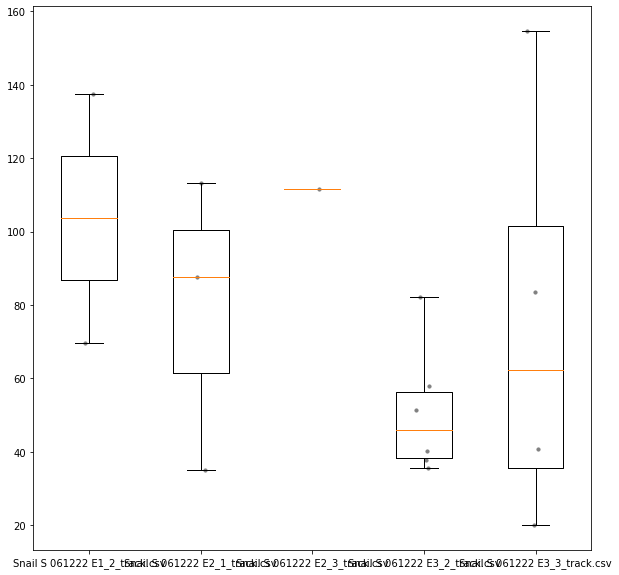

In [183]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# initialize dataframe
# n = 200
# ngroup = 3
# df = pd.DataFrame({'data': np.random.rand(n), 'group': map(np.floor, np.random.rand(n) * ngroup)})
fig, ax = plt.subplots()

group = 'file_name'
column = 'elongation_time_norm'
grouped = result.groupby(group)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

ax.boxplot(vals, labels=names, )
ngroup = len(vals)



for x, val, clevel in zip(xs, vals, clevels):
    ax.scatter(x, val, c='grey', alpha=1, s=10)
    
ax.grid(False)
fig.set_size_inches((10,10))

In [164]:
result[["file_name", 'len_track','elongation_time_norm', 'init_translation_rate']]

,file_name,len_track,elongation_time_norm,init_translation_rate
0,Snail S 061222 E1_2_track.csv,143.91,69.748383,0.443192
1,Snail S 061222 E1_2_track.csv,94.38,137.515045,1.279751
2,Snail S 061222 E2_1_track.csv,131.04,35.089146,0.172934
3,Snail S 061222 E2_1_track.csv,103.35,113.367056,1.364522
4,Snail S 061222 E2_1_track.csv,117.39,87.71803,0.932712
5,Snail S 061222 E2_3_track.csv,94.77,111.593024,1.078833
6,Snail S 061222 E3_2_track.csv,120.12,82.250445,0.427895
7,Snail S 061222 E3_2_track.csv,152.1,35.461048,0.450059
8,Snail S 061222 E3_2_track.csv,90.09,37.602218,0.1474
9,Snail S 061222 E3_2_track.csv,151.32,51.45794,0.668922


In [175]:
result[["file_name", 'len_track','elongation_time_norm', 'init_translation_rate']].mean()

/tmp/ipykernel_186001/2480877291.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result[["file_name", 'len_track','elongation_time_norm', 'init_translation_rate']].mean()


len_track                134.428125
elongation_time_norm      72.424092
init_translation_rate      0.686732
dtype: float64